In [15]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [16]:
# Visualize a few images
def visualize(data, labels , num_images_to_visualize):
    for i in range(num_images_to_visualize):
        plt.subplot(1, num_images_to_visualize, i + 1)
        image = data[i].reshape(100, 100, 3)  # Reshape the flattened image back to its original shape (color)
        plt.imshow(image)
        plt.title("Class: " + str(labels[i]))
        plt.axis('off')

    plt.show()


In [17]:
def load_images_from_directory(directory_path):
    class_labels = os.listdir(directory_path)
    data = []
    labels = []

    for label_idx, class_label in enumerate(class_labels):
        class_path = os.path.join(directory_path, class_label)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)  # Load the image in color
            if image is not None:
                resized_image = cv2.resize(image, (100, 100))  # Resize to a fixed size
                flattened_image = resized_image.flatten()  # Flatten the image into a 1D array
                data.append(flattened_image)
                labels.append(label_idx)

    return np.array(data), np.array(labels)


In [25]:
# train dataset
directory_path = "../DATASETS/guava.v6i.tensorflow/train"
train_data, train_labels = load_images_from_directory(directory_path)

print("Loaded data shape:", train_data.shape)
print("Loaded labels shape:", train_labels.shape)

NotADirectoryError: [WinError 267] The directory name is invalid: '../DATASETS/guava.v6i.tensorflow/train\\FLIR_20220224_094629_jpg.rf.2b9691e03023a2778e2fd133c656d9de.jpg'

In [19]:
# test dataset
directory_path = "../DATASETS/mango_thermal/test"
test_data, test_labels = load_images_from_directory(directory_path)

print("Loaded data shape:", test_data.shape)
print("Loaded labels shape:", test_labels.shape)

Loaded data shape: (11, 30000)
Loaded labels shape: (11,)


In [20]:
# valid dataset
directory_path = "../DATASETS/mango_thermal/valid"
valid_data, valid_labels = load_images_from_directory(directory_path)

print("Loaded data shape:", valid_data.shape)
print("Loaded labels shape:", valid_labels.shape)

Loaded data shape: (24, 30000)
Loaded labels shape: (24,)


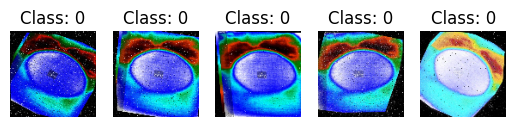

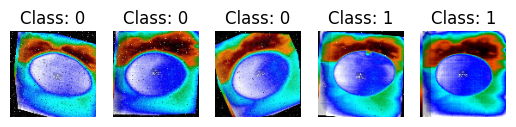

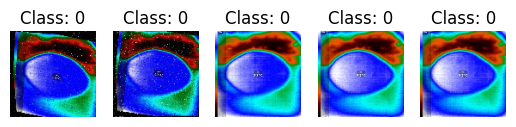

In [21]:
visualize(train_data,train_labels,5)
visualize(test_data, test_labels,5)
visualize(valid_data,valid_labels,5)

KNN

In [22]:
# Split data into training and validation sets
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_labels)

# Predict on validation set
valid_predictions = knn.predict(valid_data)

# Calculate accuracy
val_accuracy = accuracy_score(valid_labels, valid_predictions)
print("Validation Accuracy:", val_accuracy)
# Test KNN classifier
test_predictions = knn.predict(test_data)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 1.0
Test Accuracy: 0.9090909090909091


In [24]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(train_data, train_labels)

# Predict on validation set
valid_predictions_svm = svm_classifier.predict(valid_data)

# Calculate accuracy
val_accuracy_svm = accuracy_score(valid_labels, valid_predictions_svm)
print("SVM Validation Accuracy:", val_accuracy_svm)

# Test SVM classifier
test_predictions_svm = svm_classifier.predict(test_data)
test_accuracy_svm = accuracy_score(test_labels, test_predictions_svm)
print("SVM Test Accuracy:", test_accuracy_svm)

SVM Validation Accuracy: 1.0
SVM Test Accuracy: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training and validation sets

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data, train_labels)

# Predict on validation set
valid_predictions_rf = rf_classifier.predict(valid_data)

# Calculate accuracy
val_accuracy_rf = accuracy_score(valid_labels, valid_predictions_rf)
print("Random Forest Validation Accuracy:", val_accuracy_rf)

# Test Random Forest classifier
test_predictions_rf = rf_classifier.predict(test_data)
test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)


Test Accuracy: 0.9090909090909091
